In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
image = cv.imread ('1975.jpg') 
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

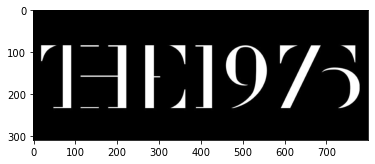

In [3]:
plt.imshow(gray,cmap='gray')

In [4]:
def gsToBW(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j]<128:
                img[i,j]=0
            else:
                img[i,j]=255
    return img

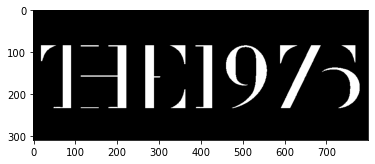

In [5]:
bw_img=gsToBW(gray)
plt.imshow(bw_img,cmap='gray')

In [6]:
#kernel adalah struktur elemen yang dipakai
kernel = np.array([[1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1]])


In [7]:
def cekErosi(temp,kernel): 
    for i in range(kernel.shape[0]):
      for j in range(kernel.shape[1]):
        #ketika kernel bernilai satu akan tetapi nilai matriks yang diperiksa bernilai 0
        #maka nilai yang di return false.
        if(kernel[i][j]==1 and temp[i][j] == 0): 
          return False
    #ketika semua nilai telah diperiksa dan semua bernilai 1 maka return true
    return True

In [8]:
def cekDilasi(temp,kernel): 
    for i in range(kernel.shape[0]):
      for j in range(kernel.shape[1]):
        #ketika kernel bernilai satu akan tetapi nilai matriks yang diperiksa bernilai 1 atau 255 (selain 0)
        #maka nilai yang di return True.
        if(kernel[i][j]==1 and temp[i][j] != 0): 
          return True
    #ketika semua nilai telah diperiksa dan semua bernilai 0 maka return False
    return False 

In [9]:
def erosi(citra,kernel,jmlpad):
    result = np.zeros(citra.shape)  #mendeklarasi citra hasil
    pad = np.pad(citra,(jmlpad,jmlpad),mode='constant') #memberikan padding pada citra
    for i in range(citra.shape[0]):  #melakukan perulangan pada nilai asal citra yg telah di padding
        for j in range(citra.shape[1]):  #melakukan perulangan pada nilai asal citra yang telah dipadding
            temp = pad[i:i+len(kernel),j:j+len(kernel)] #diambil potongan matriks 3x3 dari citra yang telah dipadding
            cek =cekErosi(temp,kernel); #dilakukan pemanggilan fungsi cekerosi
            if(cek): #ketike cek bernilai true
              result[i][j] = 255 #maka pixel origin citra diberi nilai 255
    return result #return result

In [10]:
def dilasi(citra,kernel,jmlpad):
    result = np.zeros(citra.shape) #mendeklarasi citra hasil
    pad = np.pad(citra,(jmlpad,jmlpad),mode='constant') #memberikan padding pada citra
    for i in range(citra.shape[0]):  #melakukan perulangan pada baris nilai asal citra yg telah di padding
        for j in range(citra.shape[1]):  #melakukan perulangan pada kolom nilai asal citra yg telah di padding
            temp = pad[i:i+len(kernel),j:j+len(kernel)] #diambil potongan matriks 3x3 dari citra yang telah dipadding
            cek = cekDilasi(temp,kernel); #dilakukan pemanggilan fungsi cekDilasi
            if(cek): #jika true
              result[i][j] = 255 #maka pixel origin citra diberi nilai 255
    return result #return result

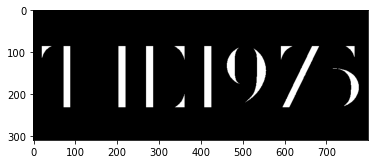

In [11]:
#operasi Erosi dari citra biner hasil tresholding
Erosi = erosi(bw_img,kernel,2)
plt.imshow(Erosi,cmap='gray')

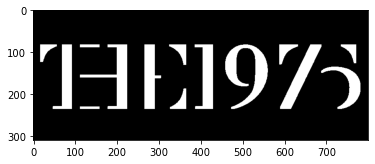

In [12]:
Dilasi = dilasi(bw_img,kernel,2)
plt.imshow(Dilasi,cmap='gray')

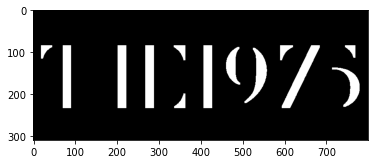

In [13]:
Opening = dilasi(Erosi,kernel,2)
plt.imshow(Opening,cmap='gray')

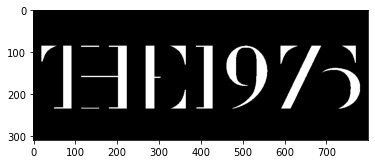

In [14]:
Closing = erosi(Dilasi,kernel,3)
plt.imshow(Closing,cmap='gray')

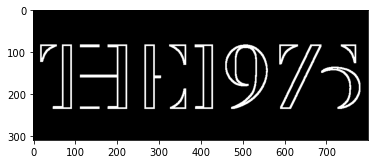

In [15]:
GradMoprh=np.abs(Dilasi-Erosi)
plt.imshow(GradMoprh,cmap='gray')